In [1]:
import pandas as pd

In [6]:
rowdata = {'电影名字':['无问西东', '后来的我们', '前任3', '红海行动', '唐人街探案', '战狼2'],
          '打斗镜头':[23,1,2,55,44,78],
          '其他镜头':[56,78,76,1,4,5],
          '电影类型':['A','A','A','B','B','B']}

In [8]:
data = pd.DataFrame(rowdata)
data

,电影名字,打斗镜头,其他镜头,电影类型
0,无问西东,23,56,A
1,后来的我们,1,78,A
2,前任3,2,76,A
3,红海行动,55,1,B
4,唐人街探案,44,4,B
5,战狼2,78,5,B


In [10]:
new_data = [24, 67]
dist = list(((data.iloc[:6, 1:3]-new_data)**2).sum(1)**0.5)
dist

[11.045361017187261,
 25.495097567963924,
 23.769728648009426,
 72.91776189653656,
 66.09841147864296,
 82.21921916437786]

In [11]:
dist_1 = pd.DataFrame({'dist':dist, 'label':(data.iloc[:6, 3])})
dr = dist_1.sort_values(by = 'dist')[:4]
dr

,dist,label
0,11.045361,A
2,23.769729,A
1,25.495098,A
4,66.098411,B


In [13]:
re = dr.loc[:, 'label'].value_counts()
re

A    3
B    1
Name: label, dtype: int64

In [14]:
re.index[0]

'A'

In [15]:
result = []
result.append(re.index[0])
result

['A']

In [17]:
data.iloc[:6]

,电影名字,打斗镜头,其他镜头,电影类型
0,无问西东,23,56,A
1,后来的我们,1,78,A
2,前任3,2,76,A
3,红海行动,55,1,B
4,唐人街探案,44,4,B
5,战狼2,78,5,B


In [ ]:
def Knn(rowData, newData):
    data = pd.DataFrame(rowdata)
    data
    

In [ ]:
import pandas as pd

In [153]:
rowdata = {'人员ID':['A', 'B', 'C', 'D', 'E', 'F'],
          '入院诊断':['急性胰腺炎','急性胃穿孔','急性阑尾炎','慢性胰腺炎','慢性胆囊炎','慢性阑尾炎'],
           '住院天数':[15,19,18,13,5,6],
          '出院费用':[2056,2078,4076,1028,1564,1005],
           '药品费用':[222,456,345,234,789,877],
          '医保类型':['违规','违规','违规','未知','合格','合格']}

In [96]:
data = pd.DataFrame(rowdata)
data

,人员ID,入院诊断,住院天数,出院费用,药品费用,医保类型
0,A,急性胰腺炎,15,2056,222,违规
1,B,急性胃穿孔,19,2078,456,违规
2,C,急性阑尾炎,18,4076,345,违规
3,D,慢性胰腺炎,13,1028,234,未知
4,E,慢性胆囊炎,5,1564,789,合格
5,F,慢性阑尾炎,6,1005,877,合格


In [97]:
new_rowdata = {'人员ID':['G'],
          '入院诊断':['急性胰腺炎'],
           '住院天数':[13],
          '出院费用':[3367],
            '药品费用':[853],
          '医保类型':['']}

new_data = pd.DataFrame(new_rowdata)

new_data

,人员ID,入院诊断,住院天数,出院费用,药品费用,医保类型
0,G,急性胰腺炎,13,3367,853,


In [98]:
new_data.iloc[0, 2:3]

住院天数    13
Name: 0, dtype: object

In [99]:
new_data.iloc[0, 2:4]

住院天数      13
出院费用    3367
Name: 0, dtype: object

In [100]:
data.iloc[:6, 2]

0    15
1    19
2    18
3    13
4     5
5     6
Name: 住院天数, dtype: int64

In [101]:
new_rowdata['住院天数']

[13]

In [158]:
data.iloc[:, 2:5]

,住院天数,出院费用,药品费用
0,15,2056,222
1,19,2078,456
2,18,4076,345
3,13,1028,234
4,5,1564,789
5,6,1005,877


In [102]:
data.iloc[:6, 2] - new_rowdata['住院天数']

0    2
1    6
2    5
3    0
4   -8
5   -7
Name: 住院天数, dtype: int64

In [103]:
data.iloc[:6, 2:5]-new_data.iloc[0, 2:5]

,住院天数,出院费用,药品费用
0,2,-1311,-631
1,6,-1289,-397
2,5,709,-508
3,0,-2339,-619
4,-8,-1803,-64
5,-7,-2362,24


In [105]:
dist = list(((data.iloc[:6, 2:5]-new_data.iloc[0, 2:5])**2).sum(1)**0.5)
dist

[1454.9522328928879,
 1348.7646199392984,
 872.2213021934284,
 2419.52102698034,
 1804.1532639994862,
 2362.132299427786]

In [109]:
dist_1 = pd.DataFrame({'dist':dist, 'label':(data.iloc[:6, 5])})
dr = dist_1.sort_values(by = 'dist')[:4]
dr

,dist,label
2,872.221302,违规
1,1348.764620,违规
0,1454.952233,违规
4,1804.153264,合格


In [110]:
re = dr.loc[:, 'label'].value_counts()
re

违规    3
合格    1
Name: label, dtype: int64

In [159]:
re.index[0]

'违规'

In [111]:
result = []
result.append(re.index[0])
result

['违规']

In [74]:
def medicalClass(train, test, k):
    n = train.shape[1] - 1
    m = test.shape[0]
    result = []
    for i in range(m):
        dist = list(((train.iloc[:, :n]-test.iloc[i, 2:4])**2).sum(1)**0.5)
        dist_l = pd.DataFrame({'dist':dist, 'label':(data.iloc[:, n])})
        dr = dist_l.sort_values(by='dist')[:k]
        re = dr.loc[:, 'label'].value_counts()
        result.append(re.index[0])
    result = pd.Series(result)
    test['predict'] = result
    acc = (test.iloc[:,-1]==test.iloc[:,-2]).mean()
    print('模型预测准确率为：{acc}')
    return acc

In [87]:
data.iloc[:1]

,人员ID,入院诊断,住院天数,出院费用,医保类型
0,A,急性胰腺炎,15,2056,违规


In [92]:
data.iloc[:,4]

0    违规
1    违规
2    违规
3    合格
4    合格
5    合格
Name: 医保类型, dtype: object

In [112]:
import matplotlib.pyplot as plt

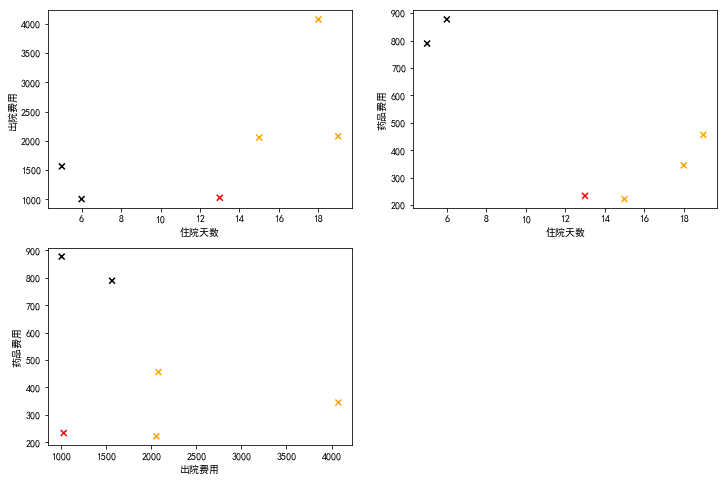

In [117]:
Colors = []
for i in range(data.shape[0]):
    m = data.iloc[i, -1]
    if m == '合格':
        Colors.append('black')
    if m == '违规':
        Colors.append('orange')
    if m == '未知':
        Colors.append('red')
        
plt.rcParams['font.sans-serif'] = ['Simhei']
pl = plt.figure(figsize=(12, 8))

fig1 = pl.add_subplot(221)
plt.scatter(data.iloc[:,2], data.iloc[:,3], marker='x', c=Colors)
plt.xlabel('住院天数')
plt.ylabel('出院费用')

fig2 = pl.add_subplot(222)
plt.scatter(data.iloc[:,2], data.iloc[:,4], marker='x', c=Colors)
plt.xlabel('住院天数')
plt.ylabel('药品费用')

fig2 = pl.add_subplot(223)
plt.scatter(data.iloc[:,3], data.iloc[:,4], marker='x', c=Colors)
plt.xlabel('出院费用')
plt.ylabel('药品费用')

plt.show()

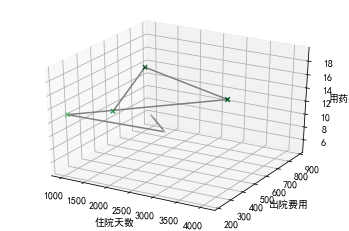

In [130]:
#绘制三角螺旋线
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ax = plt.axes(projection='3d')

#三维线的数据
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = data.iloc[:,2]
xdata = data.iloc[:,3]
ydata = data.iloc[:,4]
# ax.view_init(60, 35)
ax.set_xlabel('住院天数')
ax.set_ylabel('出院费用')
ax.set_zlabel('用药费用')
ax.scatter3D(xdata, ydata, zdata, c=zdata, marker='x', cmap='Greens')
ax.plot3D(xdata, ydata, zdata, 'gray')

In [127]:
data.iloc[:,2]

0    15
1    19
2    18
3    13
4     5
5     6
Name: 住院天数, dtype: int64

In [136]:
csv_data = pd.read_csv('meddata.csv')

In [141]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
病人ID      25 non-null int64
病人姓名      25 non-null object
入院诊断      25 non-null object
出院检查费用    25 non-null int64
出院用药费用    25 non-null int64
出院费用      25 non-null int64
其他费用      0 non-null float64
住院天数      25 non-null int64
医保类型      21 non-null object
医保违规      25 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 2.0+ KB


In [142]:
csv_data

,病人ID,病人姓名,入院诊断,出院检查费用,出院用药费用,出院费用,其他费用,住院天数,医保类型,医保违规
0,1,A,急性胰腺炎,1235,236,2584,NaN,6,新农合,是
1,2,B,慢性胃炎,1224,236,2647,NaN,7,城镇居民,否
2,3,C,急性胆囊炎,2345,123,5488,NaN,12,城镇职工,未知
3,4,E,胃穿孔,2458,324,4545,NaN,21,城镇职工,是
4,5,F,急性胰腺炎,2354,412,4587,NaN,15,新农合,是
5,6,G,食管癌,222,111,524,NaN,3,城镇居民,否
6,7,A,哮喘,1234,2344,4523,NaN,6,城镇职工,是
7,8,B,分娩,235,862,1234,NaN,5,城镇职工,否
8,9,A,肺癌,2311,12,2342,NaN,8,新农合,未知
9,10,B,胃癌,254,1234,2134,NaN,8,城镇居民,是


In [143]:
csv_data.iloc[:,6] = csv_data.iloc[:,5] - csv_data.iloc[:,4] - csv_data.iloc[:,3]

In [151]:
csv_data.iloc[:, 0:8]

,病人ID,病人姓名,入院诊断,出院检查费用,出院用药费用,出院费用,其他费用,住院天数
0,1,A,急性胰腺炎,1235,236,2584,1113,6
1,2,B,慢性胃炎,1224,236,2647,1187,7
2,3,C,急性胆囊炎,2345,123,5488,3020,12
3,4,E,胃穿孔,2458,324,4545,1763,21
4,5,F,急性胰腺炎,2354,412,4587,1821,15
5,6,G,食管癌,222,111,524,191,3
6,7,A,哮喘,1234,2344,4523,945,6
7,8,B,分娩,235,862,1234,137,5
8,9,A,肺癌,2311,12,2342,19,8
9,10,B,胃癌,254,1234,2134,646,8


In [152]:
csv_data



,病人ID,病人姓名,入院诊断,出院检查费用,出院用药费用,出院费用,其他费用,住院天数,医保类型,医保违规
0,1,A,急性胰腺炎,1235,236,2584,1113,6,新农合,是
1,2,B,慢性胃炎,1224,236,2647,1187,7,城镇居民,否
2,3,C,急性胆囊炎,2345,123,5488,3020,12,城镇职工,未知
3,4,E,胃穿孔,2458,324,4545,1763,21,城镇职工,是
4,5,F,急性胰腺炎,2354,412,4587,1821,15,新农合,是
5,6,G,食管癌,222,111,524,191,3,城镇居民,否
6,7,A,哮喘,1234,2344,4523,945,6,城镇职工,是
7,8,B,分娩,235,862,1234,137,5,城镇职工,否
8,9,A,肺癌,2311,12,2342,19,8,新农合,未知
9,10,B,胃癌,254,1234,2134,646,8,城镇居民,是


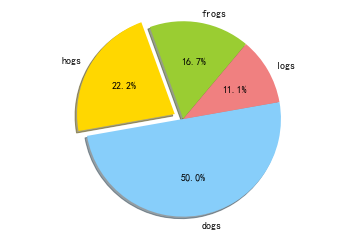

In [160]:
import matplotlib.pyplot as plt
labels='frogs','hogs','dogs','logs'
sizes=15,20,45,10
colors='yellowgreen','gold','lightskyblue','lightcoral'
explode=0,0.1,0,0
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.show()